In [28]:
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import vincent

In [30]:
file_one = os.path.join("olympicsall.csv")
olympics_df = pd.read_csv(file_one, encoding = "ISO-8859-1")
olympics_df.head()

,Year,Season,City,Sport,Discipline,Athlete,Country,Population,GDP per Capita,Gender,Event,Medal
0,1896,Summer,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,9844686.0,12363.54,Men,100M Freestyle,Gold
1,1896,Summer,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,8611088.0,43774.99,Men,100M Freestyle,Silver
2,1896,Summer,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,10823732.0,18002.23,Men,100M Freestyle For Sailors,Bronze
3,1896,Summer,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,10823732.0,18002.23,Men,100M Freestyle For Sailors,Gold
4,1896,Summer,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,10823732.0,18002.23,Men,100M Freestyle For Sailors,Silver


In [37]:
#olympics_df['Population'] = pd.to_numeric(olympics_df['Population'])
olympics_df['Country'].head()

0    Hungary
1    Austria
2     Greece
3     Greece
4     Greece
Name: Country, dtype: object

In [32]:
country_df = olympics_df.groupby('Country')
medcount_df=country_df['Medal'].count()

medcount_df.head()

Country
Afghanistan       2
Algeria          15
Argentina       259
Armenia          11
Australia      1204
Name: Medal, dtype: int64

In [33]:
#medcount_df.head()

In [34]:
#country_df = olympics_df.groupby('Country')
pop_df=country_df['Population'].mean()*.000001
pop_df.head()

Country
Afghanistan    32.526562
Algeria        39.666519
Argentina      43.416755
Armenia         3.017712
Australia      23.781169
Name: Population, dtype: float64

In [35]:
pd.Series(olympics_df["GDP per Capita"]).convert_objects(convert_numeric=True)
#pd.Series(olympics_df.convert_objects(convert_numeric=True)
#pd.Series(olympics_df["Population"]).convert_objects(convert_numeric=True)
#olympics_df["GDP per Capita"]=olympics_df["GDP per Capita"].map(" {:,.0}".format)

gdp_df=olympics_df['GDP per Capita']

C:\Users\hakob\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [14]:

popmed_df=pd.concat([pop_df, medcount_df], axis=1) 
popmed_df.head()

,Population,Medal
Country,,
Afghanistan,32.526562,2
Algeria,39.666519,15
Argentina,43.416755,259
Armenia,3.017712,11
Australia,23.781169,1204


In [15]:
scatter = vincent.Scatter(popmed_df)
scatter.axis_titles(x='Index', y='Data Value')
scatter.legend(title='Categories')
scatter.colors(brew='Set3')

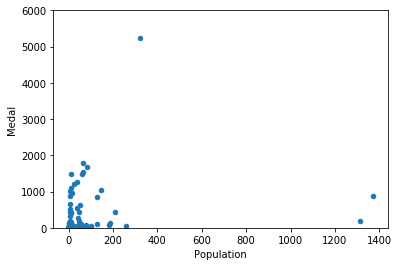

In [16]:
popmed_df.plot(kind='scatter', x='Population', y='Medal')
plt.xlim()
plt.ylim(0,6000)
plt.show()

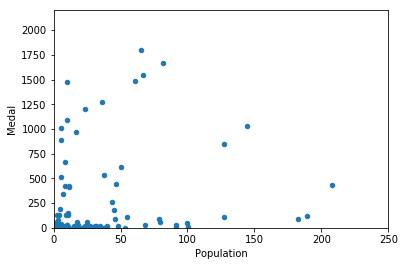

In [17]:
popmed_df.plot(kind='scatter', x='Population', y='Medal')
plt.xlim(0,250)
plt.ylim(0,2200)
plt.show()

In [38]:
pop_bins = [0, 2.95, 8.4, 20, 50, 9999 ]
pop_names = ["Under 3 million", "3 million to 8.4 million", " 8.4 million to 20 million", "20 million to 50 million", "50 million+"]



# Categorize the existing players using the age bins
popmed_df["pop_bins"] = pd.cut(popmed_df["Population"], pop_bins, labels=pop_names)

pop_demographics_totals = popmed_df["pop_bins"].value_counts()
pop_demographics_totals = pd.DataFrame({"Number of Countries": pop_demographics_totals})

pop_demographics_totals.sort_index()

,Number of Countries
Under 3 million,26
3 million to 8.4 million,26
8.4 million to 20 million,26
20 million to 50 million,25
50 million+,24
